In [6]:
pip install qiskit.dynamics

Note: you may need to restart the kernel to use updated packages.


In [1]:
#adopted from 
#https://medium.com/qiskit/introducing-qiskit-dynamics-a-new-qiskit-module-for-simulating-quantum-systems-afe004f5b92b
import numpy as np
from qiskit_dynamics import Signal 

In [2]:

# Function to define gaussian wave
def gaussian(amp, sig, t0, t):
    return amp * np.exp( -(t - t0)**2 / (2 * sig**2) )

# specifications for generating envelope
amp = 1. # amplitude
sig = 2. # sigma
t0 = 3.5*sig # center of Gaussian
T = 7*sig # end of signal

# Function to define gaussian envelope, using gaussian wave function
gaussian_envelope = lambda t: gaussian(amp, sig, t0, t)

In [3]:
gauss_signal = Signal(envelope=gaussian_envelope, carrier_freq=0.5)

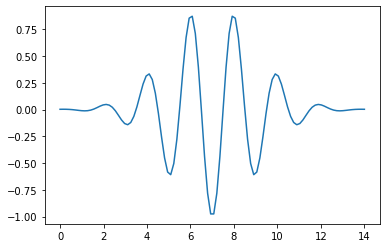

In [44]:
gauss_signal.draw(t0=0, tf=T, n=100)

In [4]:
from qiskit.quantum_info.operators import Operator
r = 0.1
w = 1.
X = Operator.from_label('X')
Y = Operator.from_label('Y')
Z = Operator.from_label('Z')
# prepare the static hamiltonian (which we call drift here):
drift = 2 * np.pi * w * Z/2 
# prepare the hamiltonian operators:
operators = [2 * np.pi * r * X/2]

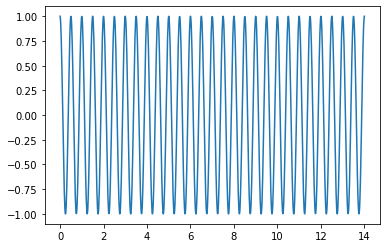

In [5]:
# Import the required module
from qiskit_dynamics import Solver
# Construct the solver
nu_d=2.0
signals = [Signal(envelope=1., carrier_freq=nu_d)]
#signals = [gauss_signal]

signals[0].draw(t0=0, tf=T, n=1000)

hamiltonian_solver = Solver(static_hamiltonian=drift, 
                            hamiltonian_operators=operators, 
                            hamiltonian_signals=signals)

In [6]:
from qiskit.quantum_info.states import Statevector
# prepare the initial Statevector to serve as a starting point
y0 = Statevector([0., 1.])
# create an array of 500 points between 0 and T
times = np.linspace(0., T, 500)
sol = hamiltonian_solver.solve(
  t_span=[0., T], # time interval to integrate over 
  y0=y0, # initial state 
  t_eval=times) # points to integrate over


In [7]:
# Return the full list of Statevectors for every point 
# during the entire solution
all_states = sol.y
# Return the Statevector at a specified t_eval point
mid_state = sol.y[249]
# Return the Statevector at the final time
final_state = sol.y[-1]

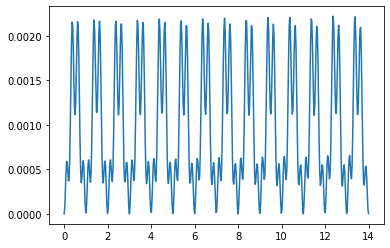

In [8]:
import matplotlib.pyplot as plt
excited_state_pop = [np.abs(y.data[0])**2 for y in sol.y]
plt.plot(times, excited_state_pop)

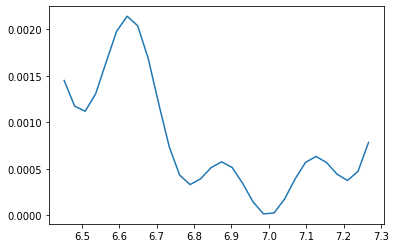

In [9]:
 plt.plot(times[230:260], excited_state_pop[230:260])

In [10]:
rwa_hamiltonian_solver = Solver(static_hamiltonian=drift, 
                                hamiltonian_operators=operators, 
                                hamiltonian_signals=signals, 
                                rotating_frame=drift,
                                rwa_cutoff_freq=2. * w)

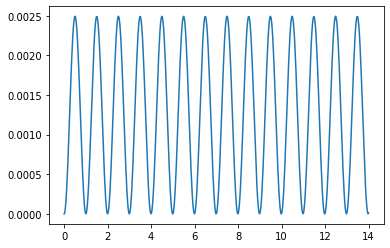

In [11]:
y0 = Statevector([0., 1.])
times = np.linspace(0., T, 500)
rwa_sol = rwa_hamiltonian_solver.solve(t_span=[0., T], y0=y0, t_eval=times)#plot the results:
rwa_pops = [np.abs(y.data[0])**2 for y in rwa_sol.y]
plt.plot(times, rwa_pops)

# Blog code - edited

In [50]:
import numpy as np

# Function to define gaussian wave
def gaussian(amp, sig, t0, t):
    return amp * np.exp( -(t - t0)**2 / (2 * sig**2) )

# specifications for generating envelope
amp = 1. # amplitude
sig = 0.399128/r # sigma #CHANGED
t0 = 3.5*sig # center of Gaussian
T = 7*sig # end of signal

# Function to define gaussian envelope, using gaussian wave function
gaussian_envelope = lambda t: gaussian(amp, sig, t0, t)


In [51]:
from qiskit_dynamics import Signal # CHANGED

w = 1. # carrier frequency #CHANGED
gauss_signal = Signal(envelope=gaussian_envelope, carrier_freq=w) #CHANGED


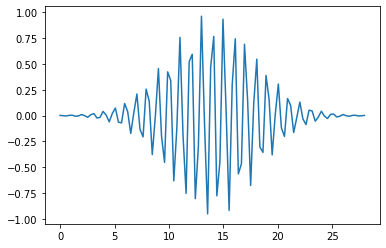

In [52]:
gauss_signal.draw(t0=0, tf=T, n=100)

In [53]:
from qiskit.quantum_info.operators import Operator
r = 0.1
w = 1.
X = Operator.from_label('X')
Y = Operator.from_label('Y')
Z = Operator.from_label('Z')
# prepare the static hamiltonian (which we call drift here):
drift = 2 * np.pi * w * Z/2 
# prepare the hamiltonian operators:
operators = [2 * np.pi * r * X/2]

In [55]:

# Import the required module
from qiskit_dynamics import Solver
# Construct the solver
hamiltonian_solver = Solver(static_hamiltonian=drift, 
                            hamiltonian_operators=operators, 
                            hamiltonian_signals=[gauss_signal]) #CHANGED

In [56]:

from qiskit.quantum_info.states import Statevector
# prepare the initial Statevector to serve as a starting point
y0 = Statevector([0., 1.])
# create an array of 500 points between 0 and T
times = np.linspace(0., T, 500)
sol = hamiltonian_solver.solve(
  t_span=[0., T], # time interval to integrate over 
  y0=y0, # initial state 
  t_eval=times, # points to integrate over
)

In [57]:

# Return the full list of Statevectors for every point 
# during the entire solution
all_states = sol.y
# Return the Statevector at a specified t_eval point
mid_state = sol.y[249]
# Return the Statevector at the final time
final_state = sol.y[-1]

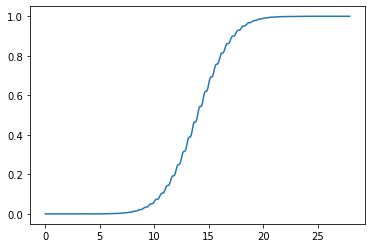

In [58]:
import matplotlib.pyplot as plt #CHANGED

excited_state_pop = [np.abs(y.data[0])**2 for y in sol.y]
plt.plot(times, excited_state_pop)

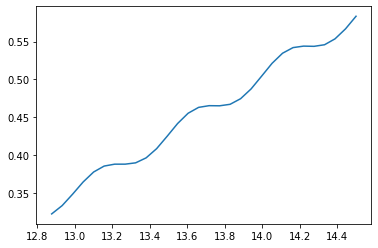

In [59]:
plt.plot(times[230:260], excited_state_pop[230:260])

In [60]:
rwa_hamiltonian_solver = Solver(static_hamiltonian=drift, 
                                hamiltonian_operators=operators, 
                                hamiltonian_signals=signals, 
                                rotating_frame=drift,
                                rwa_cutoff_freq=2. * w)

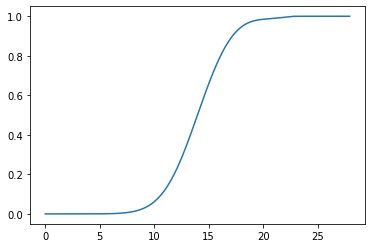

In [61]:
y0 = Statevector([0., 1.])
times = np.linspace(0., T, 500)
rwa_sol = rwa_hamiltonian_solver.solve(t_span=[0., T], y0=y0, t_eval=times)
#plot the results:
rwa_pops = [np.abs(y.data[0])**2 for y in rwa_sol.y]
plt.plot(times, rwa_pops)